In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data_file = pd.read_csv("dirty_v3_path.csv")
data_file.head(20)

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426
5,50.0,Male,Hypertension,107.00,171.80,25.33,95.21,5,233.10,203.67,5.48,1,0,5.01,4.65,0,7.25,6.35,ipsum,108.411983
6,80.0,Male,Hypertension,NaN,174.52,29.87,97.96,3,247.11,128.27,5.99,1,1,1.92,5.76,1,8.25,7.23,ipsum,7.009539
7,50.0,Male,Cancer,NaN,136.13,26.37,82.72,19,209.26,137.79,6.23,1,0,5.34,3.34,0,8.76,4.94,###,64.247308
8,60.0,Female,Obesity,NaN,NaN,35.49,98.62,3,264.69,194.21,6.83,0,0,1.66,2.99,0,5.93,5.87,lorem,45.855558
9,13.0,Female,Asthma,90.60,126.88,29.24,97.96,6,193.44,163.65,6.18,1,0,5.27,5.63,0,7.09,5.41,lorem,-45.916696


In [7]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                25500 non-null  float64
 1   Gender             25500 non-null  object 
 2   Medical Condition  25500 non-null  object 
 3   Glucose            25500 non-null  float64
 4   Blood Pressure     25500 non-null  float64
 5   BMI                30000 non-null  float64
 6   Oxygen Saturation  30000 non-null  float64
 7   LengthOfStay       30000 non-null  int64  
 8   Cholesterol        30000 non-null  float64
 9   Triglycerides      30000 non-null  float64
 10  HbA1c              30000 non-null  float64
 11  Smoking            30000 non-null  int64  
 12  Alcohol            30000 non-null  int64  
 13  Physical Activity  30000 non-null  float64
 14  Diet Score         30000 non-null  float64
 15  Family History     30000 non-null  int64  
 16  Stress Level       300

# Predicting Length of Stay (LOS)
It is a regression task that Predict how long a patient will stay in the hospital using their health and lifestyle features idea

## Missing Values

In [11]:
number_of_nan={}
for name in data_file.columns:
    new=data_file[name].isnull().sum()
    number_of_nan[name] = new

print(number_of_nan)  

{'Age': 4500, 'Gender': 4500, 'Medical Condition': 4500, 'Glucose': 4500, 'Blood Pressure': 4500, 'BMI': 0, 'Oxygen Saturation': 0, 'LengthOfStay': 0, 'Cholesterol': 0, 'Triglycerides': 0, 'HbA1c': 0, 'Smoking': 0, 'Alcohol': 0, 'Physical Activity': 0, 'Diet Score': 0, 'Family History': 0, 'Stress Level': 0, 'Sleep Hours': 0, 'random_notes': 0, 'noise_col': 0}


In [36]:
## replace the null values in age column with the mean value 
age_mean = data_file["Age"].mean(axis=0)
data_file["Age"].replace(np.nan, age_mean, inplace=True) 
print(data_file["Age"].isnull().sum())

0


C:\Users\nasta\AppData\Local\Temp\ipykernel_10324\3725926404.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_file["Age"].replace(np.nan, age_mean, inplace=True)


In [38]:
## replace gender null values with most frequent one
freq = data_file["Gender"].value_counts().idxmax()
#print(freq)
data_file["Gender"].replace(np.nan,freq,inplace=True)

C:\Users\nasta\AppData\Local\Temp\ipykernel_10324\580327685.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_file["Gender"].replace(np.nan,freq,inplace=True)


In [40]:
print(data_file["Blood Pressure"].max())

226.38


In [42]:
from scipy.stats import f_oneway

groups = [group['LengthOfStay'].values for name, group in data_file.groupby('Medical Condition')]
f_stat, p_value = f_oneway(*groups)
print("F-statistic:", f_stat)
print("p-value:", p_value)


F-statistic: 5651.556974374803
p-value: 0.0


A large F-value means that the variation between groups (e.g., between different medical conditions) is much greater than the variation within each group.
8932 is very large, which means the differences between your categories are extremely strong.

A p-value of 0.0 (actually something like < 1e-10) means the chance is virtually zero.
So, you can confidently reject the null hypothesis (which says “all group means are equal”).

The Length of Stay is significantly different between medical conditions.
In fact, the difference is so strong that it’s almost impossible to be due to chance.

In [45]:
# len(data_file)
((data_file['Medical Condition'].isna().sum())/ len(data_file))* 100


0.0

In [47]:
# As it is 15% of the dataset, it's not a good idea to drop them, so let's just put them in another category:
data_file["Medical Condition"]= data_file["Medical Condition"].fillna("Unknown")
print(data_file["Medical Condition"].isnull().sum())

0


In [49]:

print(data_file["Blood Pressure"].mean())

140.13503633333332


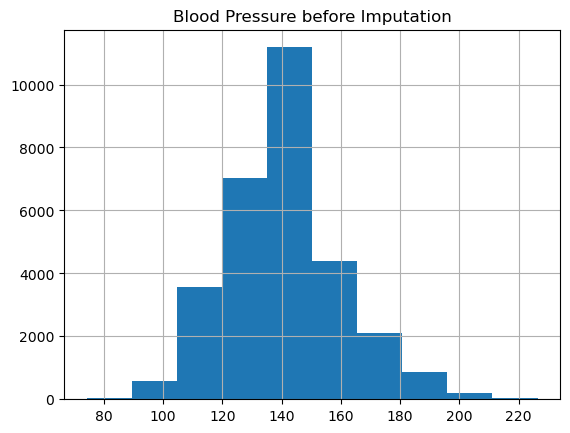

In [51]:
data_file['Blood Pressure'].hist()
plt.title('Blood Pressure before Imputation')
plt.show()


In [53]:
data_file['Blood Pressure'] = data_file['Blood Pressure'].fillna(data_file['Blood Pressure'].median())


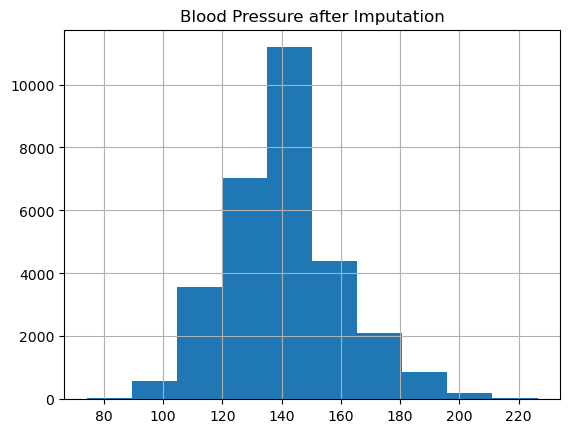

In [55]:
data_file['Blood Pressure'].hist()
plt.title('Blood Pressure after Imputation')
plt.show()

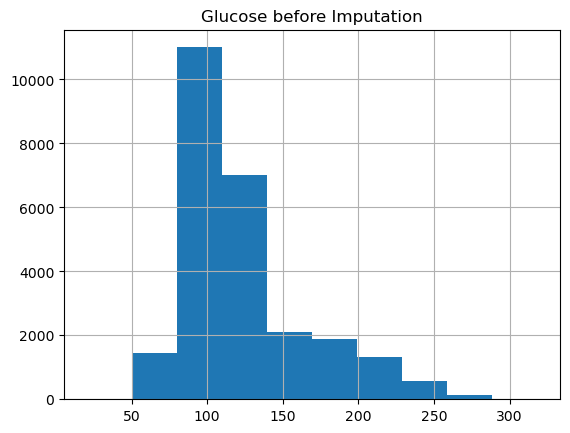

In [57]:
data_file["Glucose"].hist()
plt.title('Glucose before Imputation')
plt.show()


Because:

-15 % missing is moderate, not tiny,
-the variable is right-skewed (not symmetrical), and
-glucose is clinically important for predicting Length of Stay,

we should not use the mean (it would pull the center upward toward the extreme diabetic values).
median is better

In [62]:
data_file['Glucose'] = data_file['Glucose'].fillna(data_file['Glucose'].median())


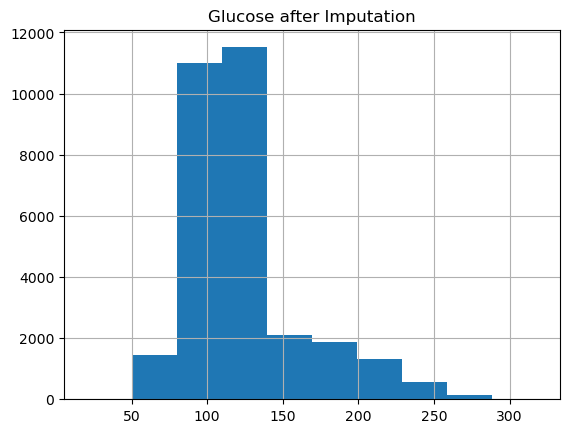

In [66]:
data_file["Glucose"].hist()
plt.title('Glucose after Imputation')
plt.show()

In [68]:
data_file['Glucose'].describe()

count    30000.000000
mean       121.653852
std         38.617255
min         20.320000
25%         98.860000
50%        110.500000
75%        128.870000
max        318.510000
Name: Glucose, dtype: float64